# Decision Trees

**Decision Trees** are versatile Machine Learning techniques that allow for both classification and regression.

In [3]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Training and Visualizing a Decision Tree

To better explain **Decision Trees**, let's analyze the code below applied to the _iris flower_ dataset:

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [7]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "iris_tree.dot"),  # path differs in the book
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

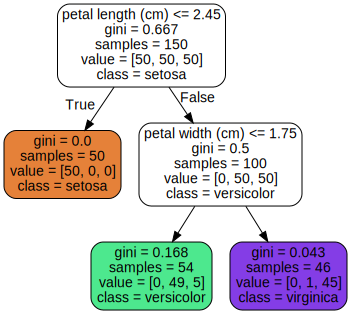

In [8]:
from graphviz import Source

Source.from_file(IMAGES_PATH / "iris_tree.dot")

## Making Predictions

**Decision Trees** have the following components:

- _Root Node_: Initial part where the first values ​​to be differentiated are defined. Depth 0, located at the top. Asks if the length of the flower is less than or equal to 2.45cm.

- _Path_: The path that moves indicates whether what was promised in the previous node is True or False. If it went to the Left path, it corresponds to True, that is, in our case, the size was equal to or less than 2.45cm. If it went to the Right path, it indicates that it is False, that is, it is not equal to or less than 2.45cm.

- _Leaf Node_: Node that has no more branches, no more child nodes, therefore, it does not ask any more questions;

- _Split Node_: Node that culminates in more branches (depth n).

The attributes in each of the _Nodes_ are:

- Feature being analyzed, or _Decision Boundaries_
- _Gini_: Gini impurity, explained below
- _Samples_: Number of total samples in this _node_
- _Value_: Number of instances corresponding to each class (e.g. in the _leaf node_ on the left, 50 _Iris setosa_, 0 _Iris versicolor_ and 0 _Iris virginica_)
- _Class_: predicted dominant class in the _node_

Below, we see a graphical demonstration of the _Decision Trees_, where the lines represent the _Decision Boundaries_

**Gini Impurity** measures the degree of impurity of the _Node_. Basically, it indicates how much of the sample contained in _values_ corresponds to _class_. It is represented by the equation below:

$$
G_{i} = 1 - \sum_{k=1}^{n} p_{i,k}^{2}
$$

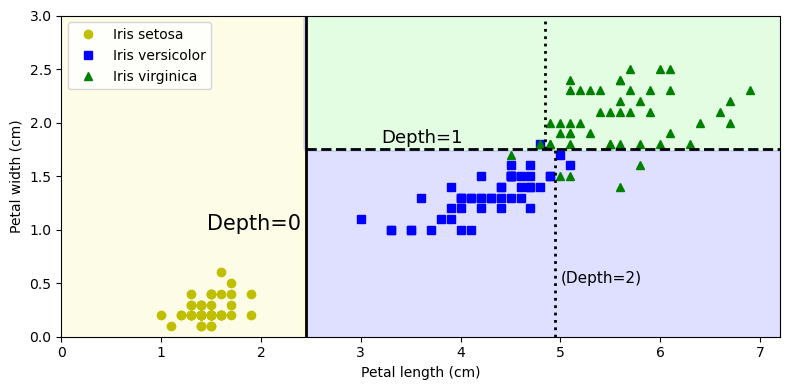

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# extra code – just formatting details
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

# extra code – this section beautifies and saves Figure 6–2
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()
save_fig("decision_tree_decision_boundaries_plot")

plt.show()

## Estimating Class Probabilities

To estimate the probabilities, we look at the rate of training instances per class k in a given node. For example, let's assume we want petals that are 5cm long and 1.5cm wide (corresponding to depth 2 in the left node):

Iris setosa
$$
P_{setosa} = \frac{0}{54} = 0%
$$

Iris versicolor
$$
P_{versicolor} = \frac{49}{54} = 90.7%
$$

Iris virginica
$$
P_{virginica} = \frac{5}{54} = 9.3%
$$

## The CART Training Algorithm

**Classification And Regression Tree** (CART) is the algorithm for training trees. It operates by dividing into _left_ and _right_ subsets from a feature (k) and a threshold ($t_{k}$), for example, "$petal \_ lenght \leq 2.45cm$". From there it goes to deeper subsets until it obtains the one with the highest purity. It is governed by the equation below:

$$
J(k,t_{k}) = \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right}
$$

## Computational Complexity

The training complexity is O(n × m log_{2}(m)).

## Gini Impurity or Entropy?

## Regularization Hyperparameters

## Regression